# LAB #4

In [46]:
from sklearn import datasets
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression


X, y = datasets.load_diabetes(as_frame=True, scaled=False, return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def model_estimation(model, y_train, y_test, y_pred_train, y_pred_test):
    """
    Evaluate the model using MAE. 
    Inputs:
        model: the model to be evaluated
        y_train: the true y values of the train dataset
        y_test: the true y values of the test dataset
        y_pred_train: the predicted y values of the train dataset
        y_pred_test: the predicted y values of the test dataset
    Returns:
        None. 
        Print the MAE of the train and test datasets and the equation of the model.
        Plots of the residuals, percentage error, and histogram of the percentage error.
    """
    # create three subplots in one row
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
    # plot a scatter plot of the residuals
    ax1.scatter(y_test, y_test - y_pred_test)
    ax1.set_xlabel('$y_{test}$')
    ax1.set_ylabel('Residual $*(y_{test} - y_{pred}) / y_{test})$')
    ax1.set_title('Residuals')
    # plot a scatter plot of the percentage error
    ax2.scatter(y_test, 100. * (y_test - y_pred_test) / y_test)
    ax2.set_xlabel('$y_{test}$')
    ax2.set_ylabel('percentage error $100*(y_{test} - y_{pred}) / y_{test})$')
    ax2.set_title('Percentage error (%)')
    # plot a histogram of the percentage error
    ax3.hist(100. * (y_test - y_pred_test) / y_test, bins=20)
    ax3.set_xlabel('percentage error $100*(y_{test} - y_{pred}) / y_{test})$')
    ax3.set_ylabel('Frequency (number of test samples)')
    ax3.set_title('Histogram of percentage error (%)')
    ax3.set_ylim(top=22)

    print(f'Test Dataset: Mean Absolute Error: {mean_absolute_error(y_test, y_pred_test):.2f}')
    print(f'Train Dataset: Mean Absolute Error: {mean_absolute_error(y_train, y_pred_train):.2f}')

    # print the equation
    print('y = ', end='')
    for i, coef in enumerate(model.coef_):
        print(f'{coef:.2f} * x_{i} + ', end='')
    print(f'{model.intercept_:.2f}')
    fig.tight_layout()


Test Dataset: Mean Absolute Error: 42.79
Train Dataset: Mean Absolute Error: 43.48
y = 0.14 * x_0 + -23.06 * x_1 + 5.85 * x_2 + 1.20 * x_3 + -1.28 * x_4 + 0.81 * x_5 + 0.60 * x_6 + 10.16 * x_7 + 67.11 * x_8 + 0.20 * x_9 + -341.38


255    153.0
90      98.0
57      37.0
391     63.0
24     184.0
Name: target, dtype: float64

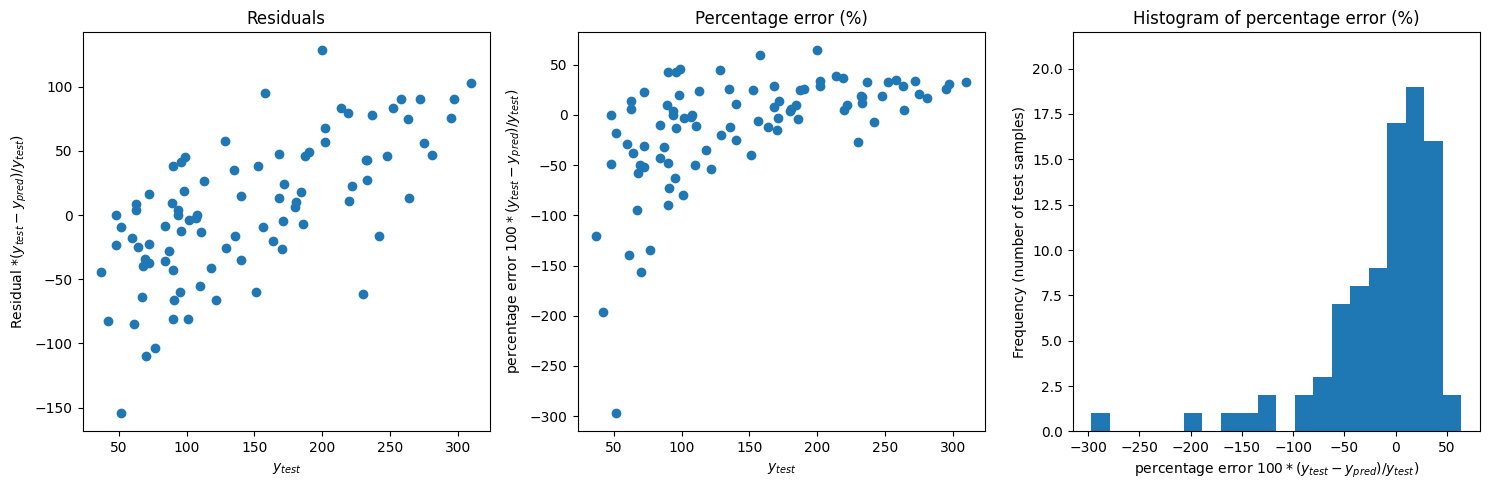

In [47]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

model_estimation(model, y_train, y_test, y_pred_train, y_pred_test)
y_test.tail()

Test Dataset: Mean Absolute Error: 43.58
Train Dataset: Mean Absolute Error: 39.14
y = -9.59 * x_0 + -11.24 * x_1 + -19.70 * x_2 + 10.64 * x_3 + -16.59 * x_4 + 26.14 * x_5 + 11.13 * x_6 + -160.29 * x_7 + -1768.67 * x_8 + -13.82 * x_9 + 0.03 * x_10 + 0.53 * x_11 + -0.05 * x_12 + 0.01 * x_13 + -0.00 * x_14 + -0.04 * x_15 + 0.08 * x_16 + 1.31 * x_17 + 0.41 * x_18 + 0.01 * x_19 + -33.71 * x_20 + 0.36 * x_21 + 0.41 * x_22 + 0.21 * x_23 + 0.25 * x_24 + -1.24 * x_25 + -26.74 * x_26 + 18.52 * x_27 + 0.27 * x_28 + 0.09 * x_29 + 0.12 * x_30 + -0.09 * x_31 + 0.12 * x_32 + -0.01 * x_33 + -1.43 * x_34 + 3.63 * x_35 + 0.02 * x_36 + -0.00 * x_37 + 0.09 * x_38 + -0.08 * x_39 + -0.11 * x_40 + -0.18 * x_41 + -2.48 * x_42 + -0.05 * x_43 + 0.18 * x_44 + -0.28 * x_45 + -0.31 * x_46 + -1.28 * x_47 + -5.05 * x_48 + -0.04 * x_49 + 0.11 * x_50 + 0.20 * x_51 + 0.37 * x_52 + 3.38 * x_53 + 0.03 * x_54 + 0.15 * x_55 + 2.20 * x_56 + 4.46 * x_57 + 0.12 * x_58 + 16.31 * x_59 + 15.19 * x_60 + 0.86 * x_61 + 273.67 * x_

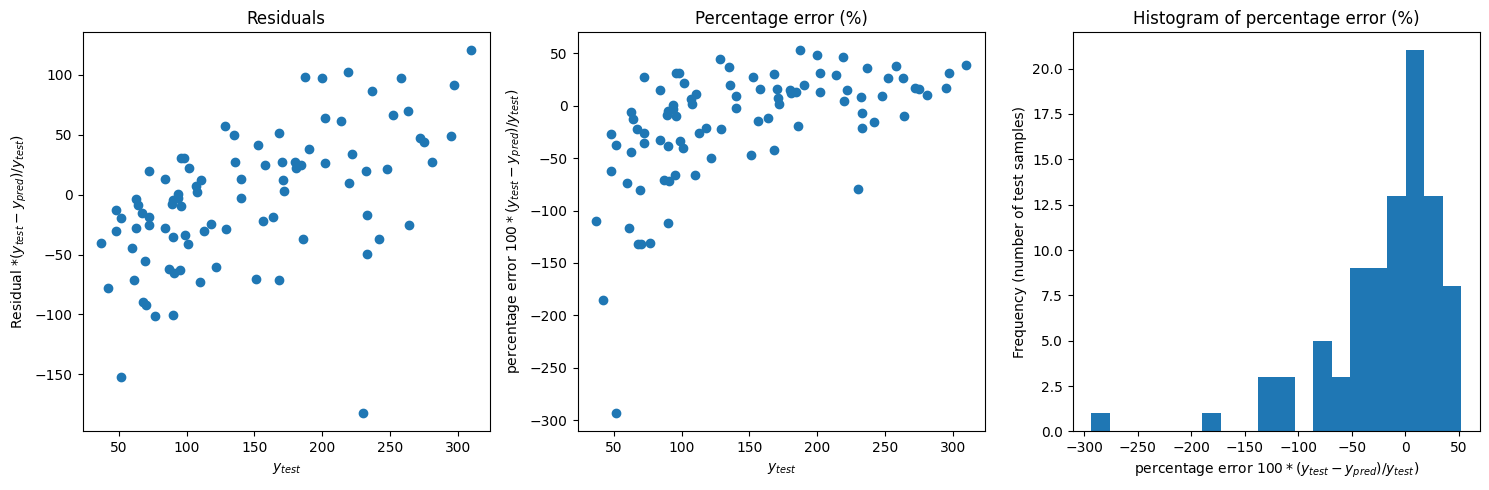

In [48]:


degree=2
poly_model = PolynomialFeatures(degree=degree, include_bias=False)

poly_x_train = poly_model.fit_transform(X_train)
poly_x_test = poly_model.fit_transform(X_test)

# poly_model.fit(poly_x_train, y_train)

regression_model = LinearRegression()

regression_model.fit(poly_x_train, y_train)

poly_y_pred_train = regression_model.predict(poly_x_train)
poly_y_pred_test = regression_model.predict(poly_x_test)

model_estimation(regression_model, y_train, y_test, poly_y_pred_train, poly_y_pred_test)

In [49]:
print(len(poly_model.get_feature_names_out()))
print(len(model.coef_))

65
10


### Q 1

There seems to be 10 features for the linear regression model and 65 for the polynomial model. The 10 correlates to the 10 columns in the data set, however the 65 can be explained by an equation to find the number of features.

## $\frac{(n_f + d)!}{(d! \cdot n_f!)}$

Where #$n_f$ is the number of features in and #$d$ is the degree

## $\frac{(10 + 2)!}{(2! \cdot 10!)} = 66$

The result is one more because it takes the intercept term into account.

Test Dataset: Mean Absolute Error: 42.79
Train Dataset: Mean Absolute Error: 43.48
y = 0.14 * x_0 + -23.06 * x_1 + 5.85 * x_2 + 1.20 * x_3 + -1.28 * x_4 + 0.81 * x_5 + 0.60 * x_6 + 10.16 * x_7 + 67.11 * x_8 + 0.20 * x_9 + -341.38
Test Dataset: Mean Absolute Error: 43.58
Train Dataset: Mean Absolute Error: 39.14
y = -9.59 * x_0 + -11.24 * x_1 + -19.70 * x_2 + 10.64 * x_3 + -16.59 * x_4 + 26.14 * x_5 + 11.13 * x_6 + -160.29 * x_7 + -1768.67 * x_8 + -13.82 * x_9 + 0.03 * x_10 + 0.53 * x_11 + -0.05 * x_12 + 0.01 * x_13 + -0.00 * x_14 + -0.04 * x_15 + 0.08 * x_16 + 1.31 * x_17 + 0.41 * x_18 + 0.01 * x_19 + -33.71 * x_20 + 0.36 * x_21 + 0.41 * x_22 + 0.21 * x_23 + 0.25 * x_24 + -1.24 * x_25 + -26.74 * x_26 + 18.52 * x_27 + 0.27 * x_28 + 0.09 * x_29 + 0.12 * x_30 + -0.09 * x_31 + 0.12 * x_32 + -0.01 * x_33 + -1.43 * x_34 + 3.63 * x_35 + 0.02 * x_36 + -0.00 * x_37 + 0.09 * x_38 + -0.08 * x_39 + -0.11 * x_40 + -0.18 * x_41 + -2.48 * x_42 + -0.05 * x_43 + 0.18 * x_44 + -0.28 * x_45 + -0.31 * x_4

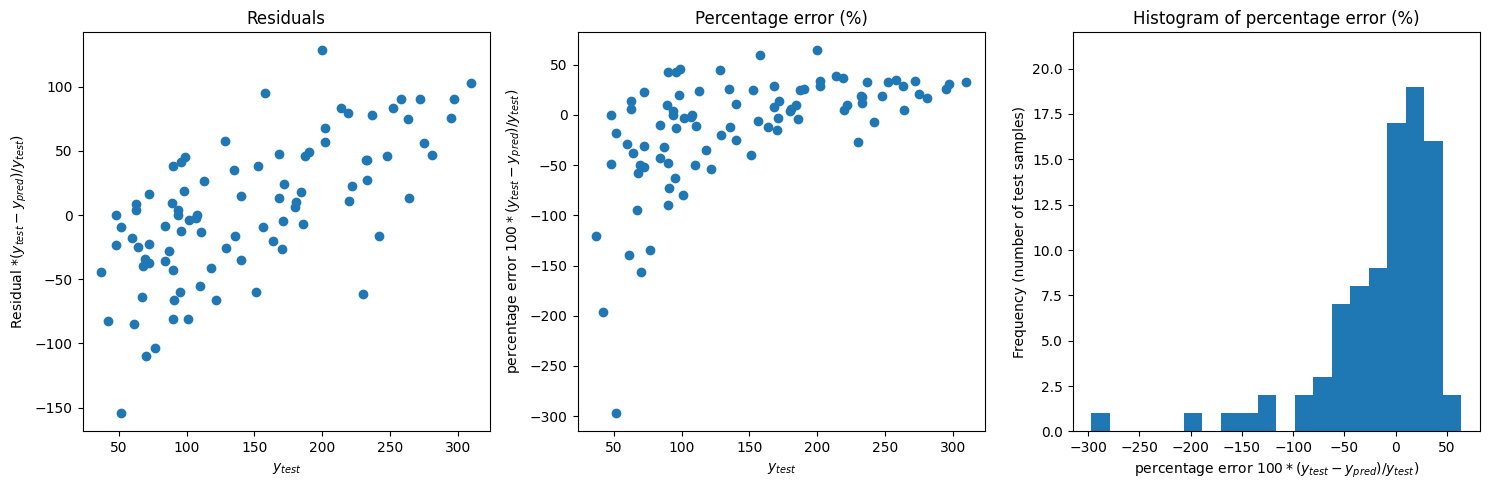

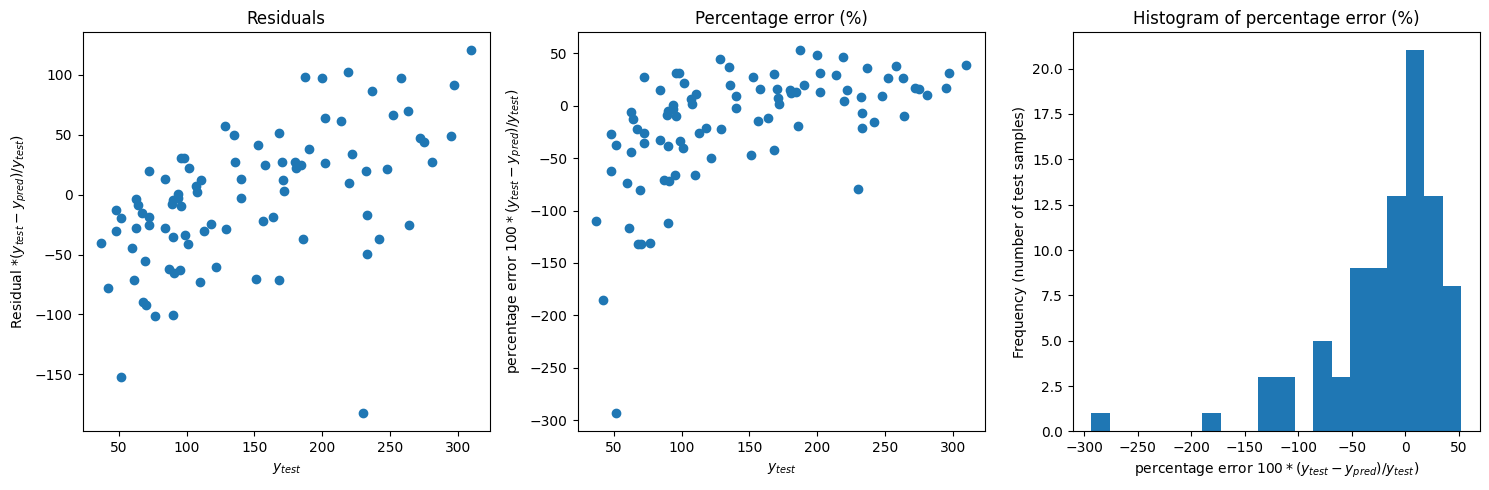

In [50]:
model_estimation(model, y_train, y_test, y_pred_train, y_pred_test)

model_estimation(regression_model, y_train, y_test, poly_y_pred_train, poly_y_pred_test)

### Q 2

There seems to be no improvement when using the polynomial model and in fact when using the liniar model there seems to be a slight decrease in the peak around 0 but there is a significant increase of values adjasent to either side of 0

### Q 3

The graphs give a great insight to goodness of fit. Allowing us to see the spread of errors in correlation of the input values. For example:

For both methods there are fewer errors above 0, and much less error when it is above 0. Both models tends to predict values that are less than the actual. The models under estimate. Also as the measure of disease progression increases the models prediction errors reduse.